In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Define your base directory where the tfevents files are located
base_dir = 'results\\'

# Initialize a structure to hold your metrics data
# Structure: {loss_function: {metric: {fold: [values]}}}
metrics_data = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

# Walk through the directory structure
for root, dirs, files in os.walk(base_dir):

    for file in files:
        if file.startswith('events.out.tfevents'):

            # print(root)
            # print(dirs)
            # print(files)

            # Extract relevant parts from the path
            parts = root.split(os.path.sep)
            # print(parts)
            
            if "train" not in parts[-1]:
                # Parse out the loss function, fold number, and metric from the directory structure
                loss_function = "_".join(parts[1].split('_')[1:-1])  # 'rankNet', 'point_wise_rmse', etc.
                fold = parts[1].split('Fold')[1]  # '1', '2', etc.
                metric = parts[5].split('_')[0] + "_" +  parts[5].split('_')[1] # 'map', 'mrr', etc.
    
                # Read the tfevents file
                path_to_events_file = os.path.join(root, file)
    
    
                for e in tf.compat.v1.train.summary_iterator(path_to_events_file):
                    for v in e.summary.value:
                            metrics_data[loss_function][metric][fold].append(v.simple_value)





Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [16]:
# list_metric = ["precision", "map", "rmse", "ndcg", "mrr"]
# levels = [1, 5, 10]
# 
# for loss in metrics_data.keys():
#     plt.figure(figsize=(10, 6))  # New figure for each loss function
# 
#     for metric in list_metric:
#         for level in levels:
#             current_metric = f"{metric}_{level}"
# 
#             if current_metric in metrics_data[loss]:  # Check if the current metric exists
#                 # Prepare data for plotting
#                 transposed_values = zip(*metrics_data[loss][current_metric].values())
#                 average = np.array([np.mean(group) for group in transposed_values])
#                 transposed_values = zip(*metrics_data[loss][current_metric].values())  # Re-transpose for std calculation
#                 std = np.array([np.std(group) for group in transposed_values])
#                 epochs = range(0, len(average))
# 
#                 # Plotting
#                 plt.plot(epochs, average, label=f'{current_metric} (Loss: {loss})')
#                 plt.fill_between(epochs, average - std, average + std, alpha=0.2)
# 
#         plt.xlabel('Epoch')
#         plt.ylabel('Metric Value')
#         # plt.ylim(0, 1)  # Assuming you want all plots to have their y-axis between 0 and 1
#         plt.title(f'Metrics Over Epochs for Loss Function: {loss}')
#         plt.legend()
#         plt.grid(True)
#         plt.show()


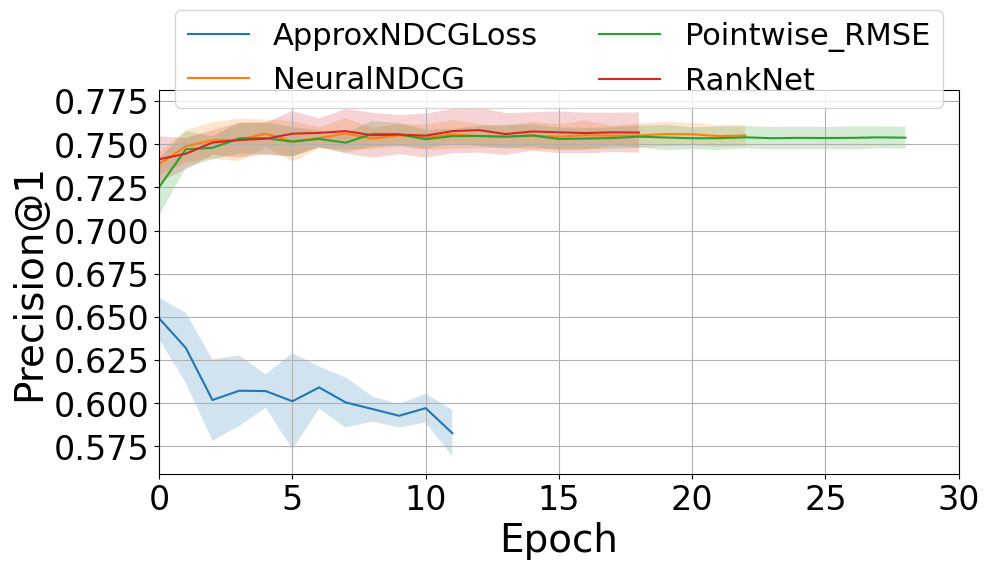

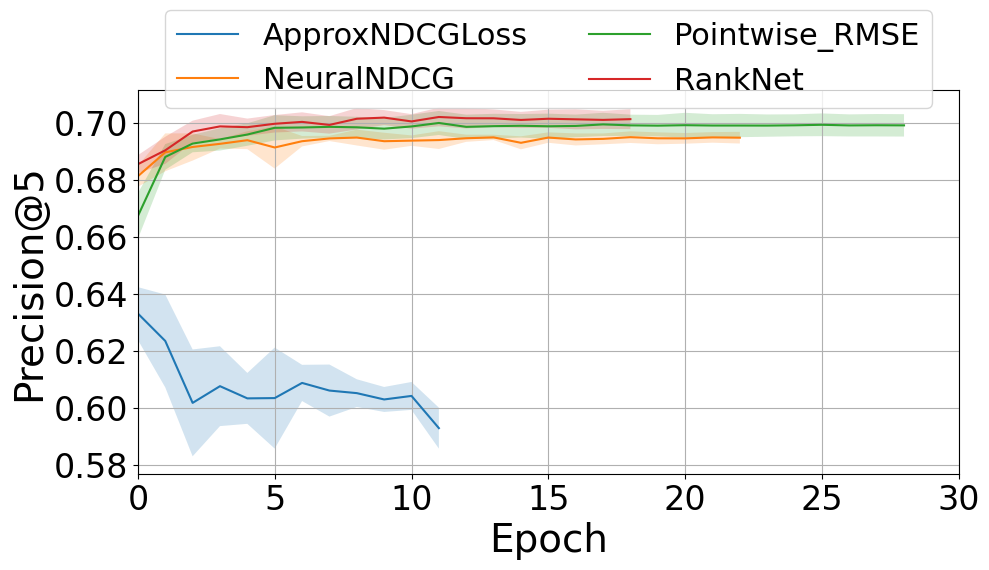

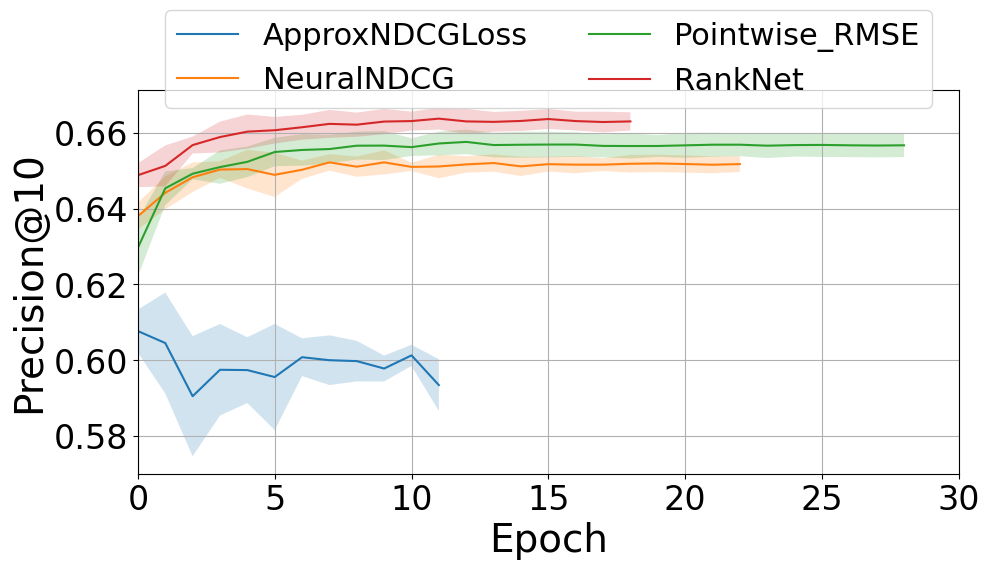

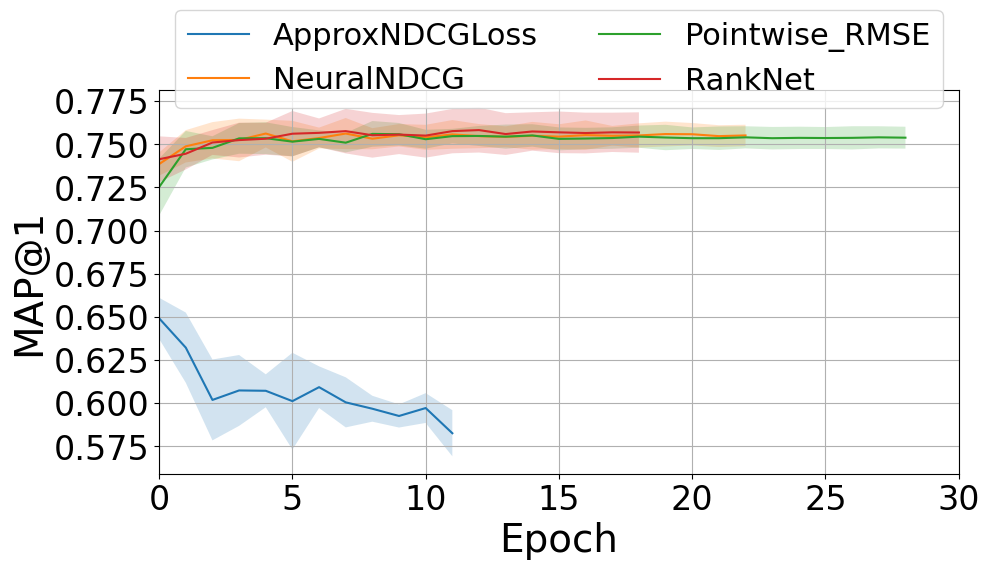

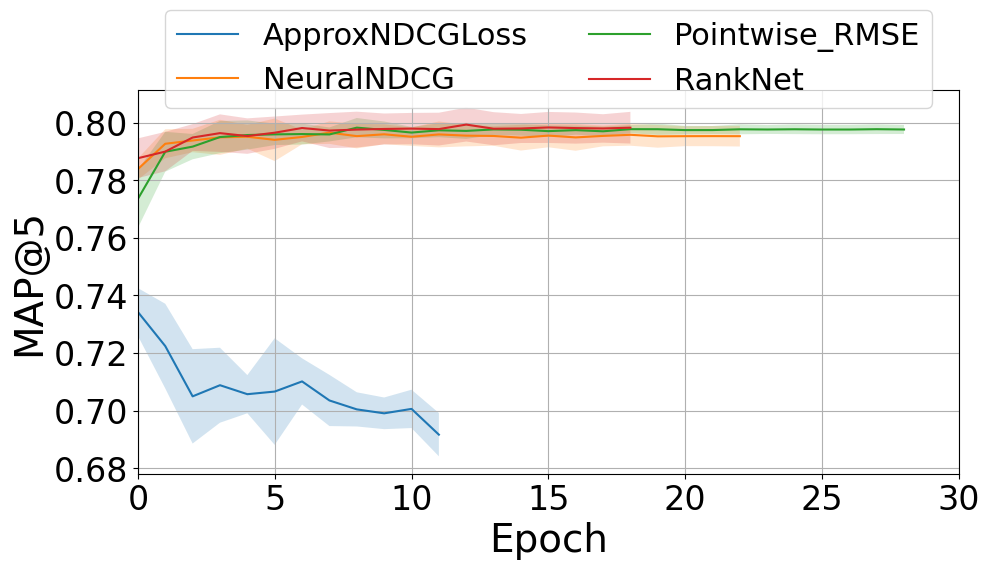

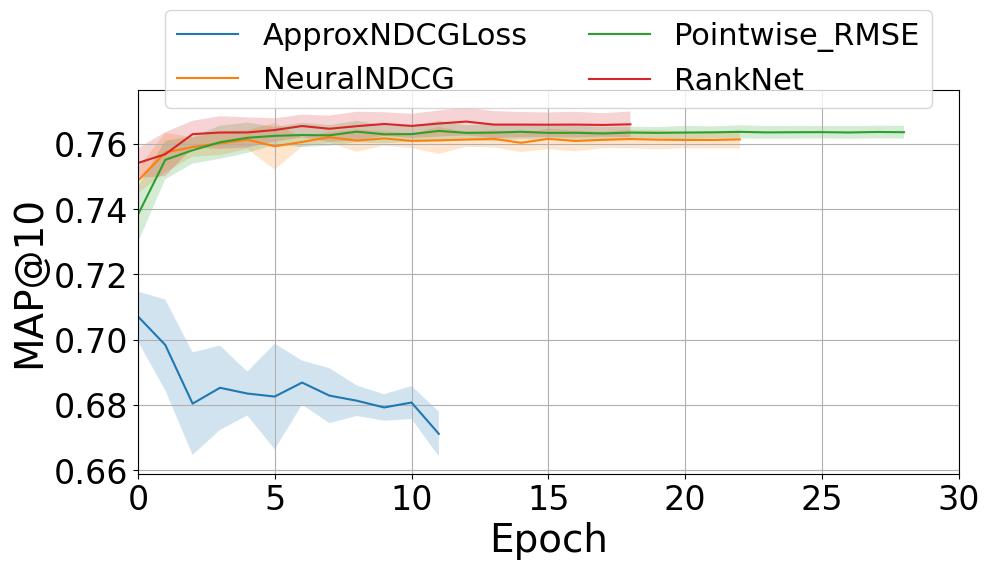

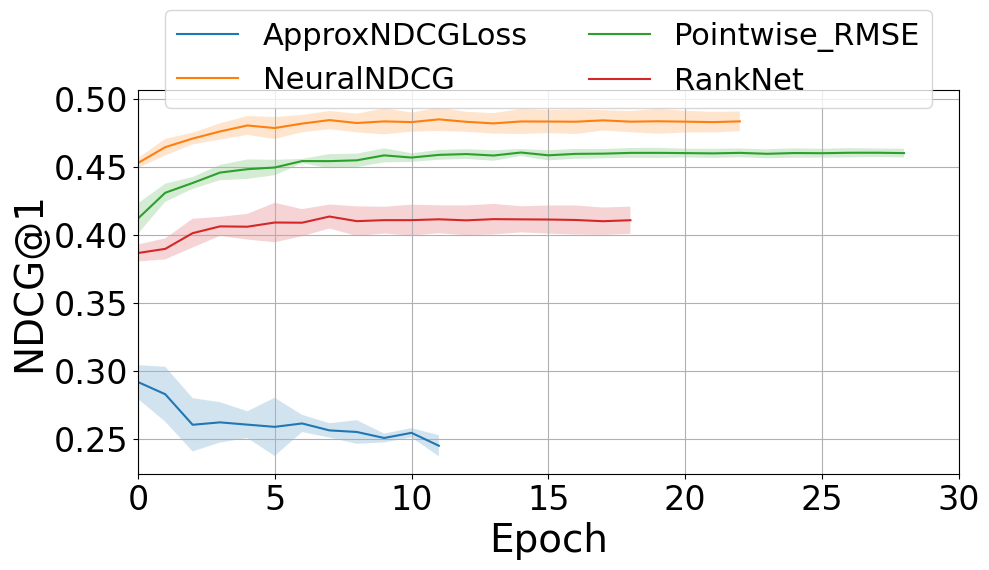

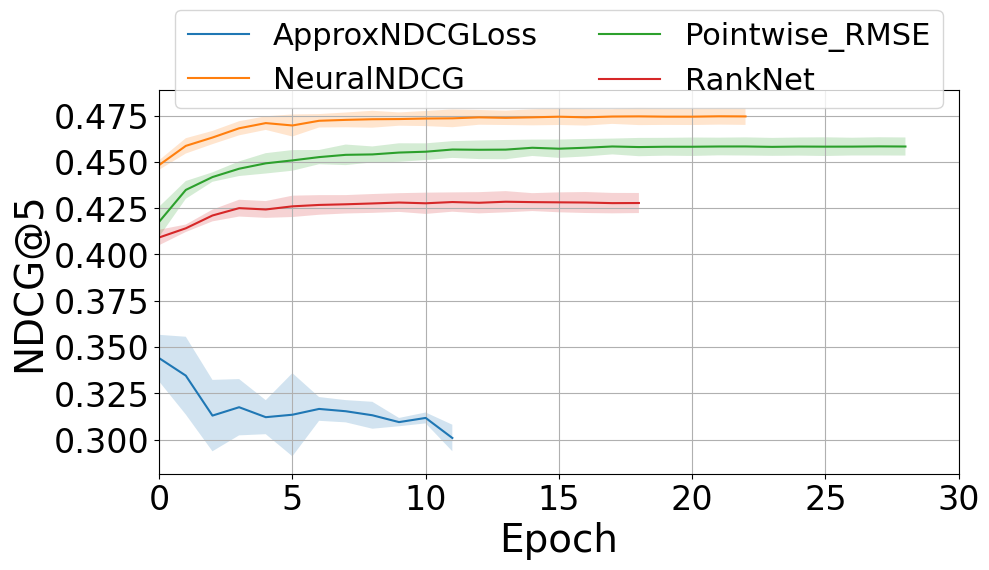

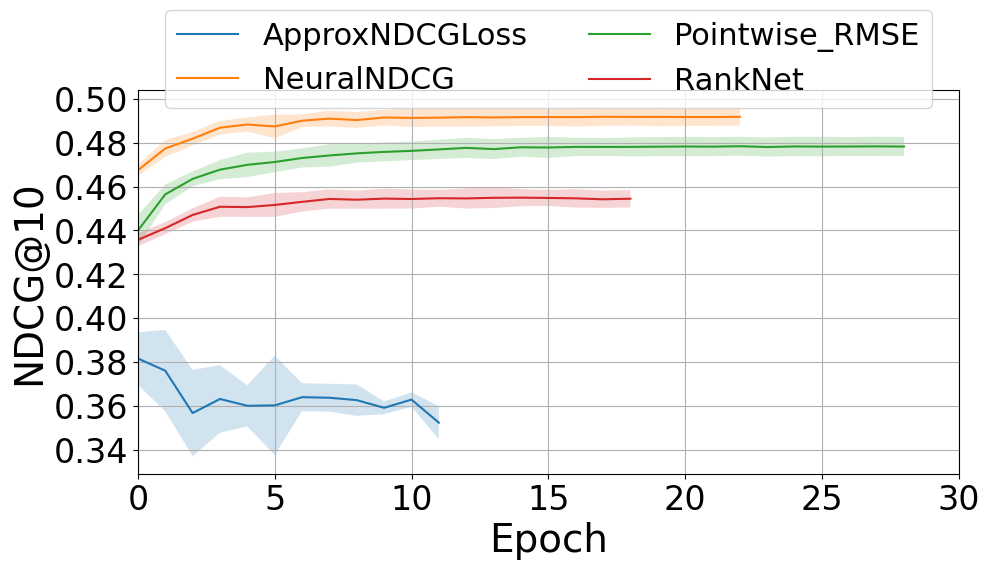

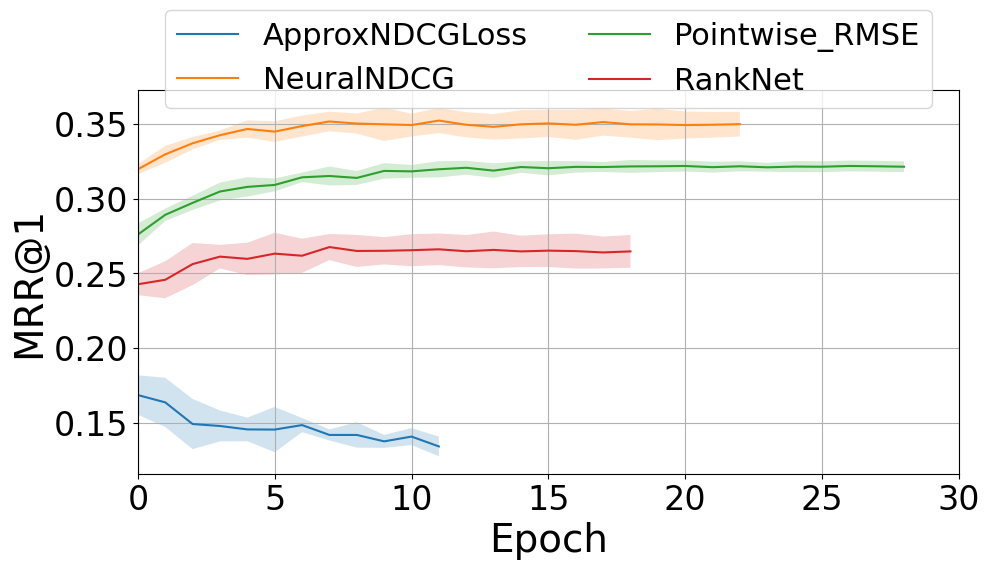

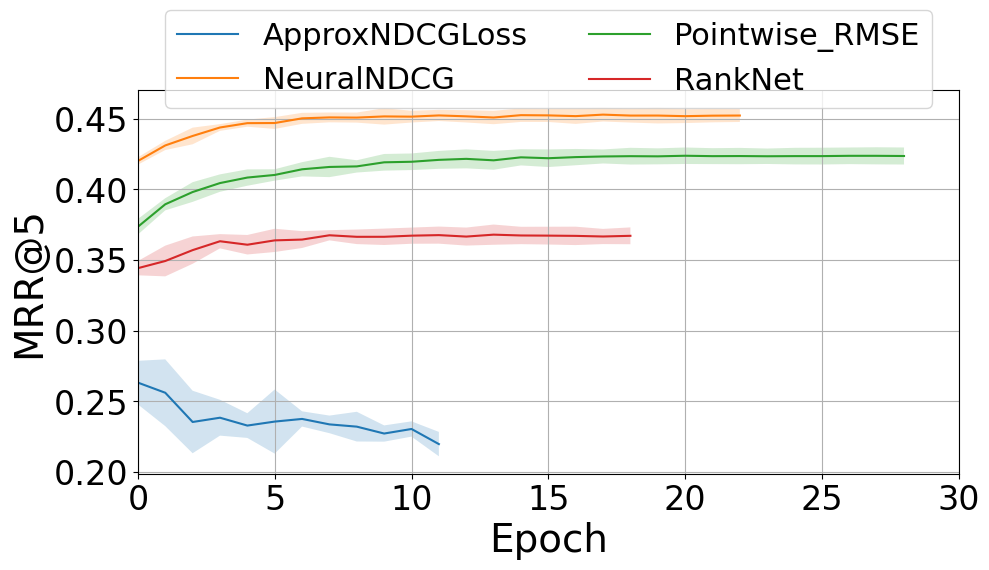

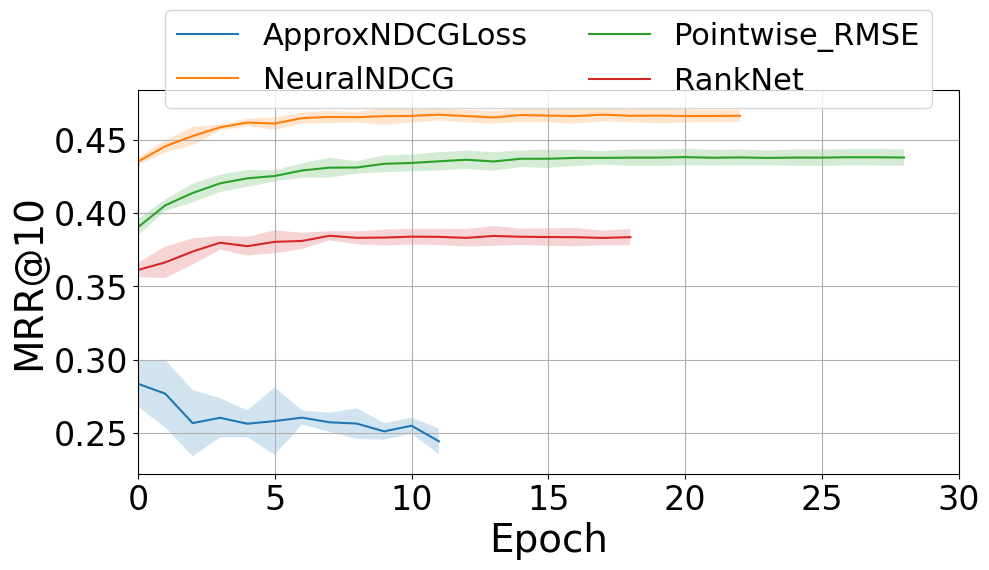

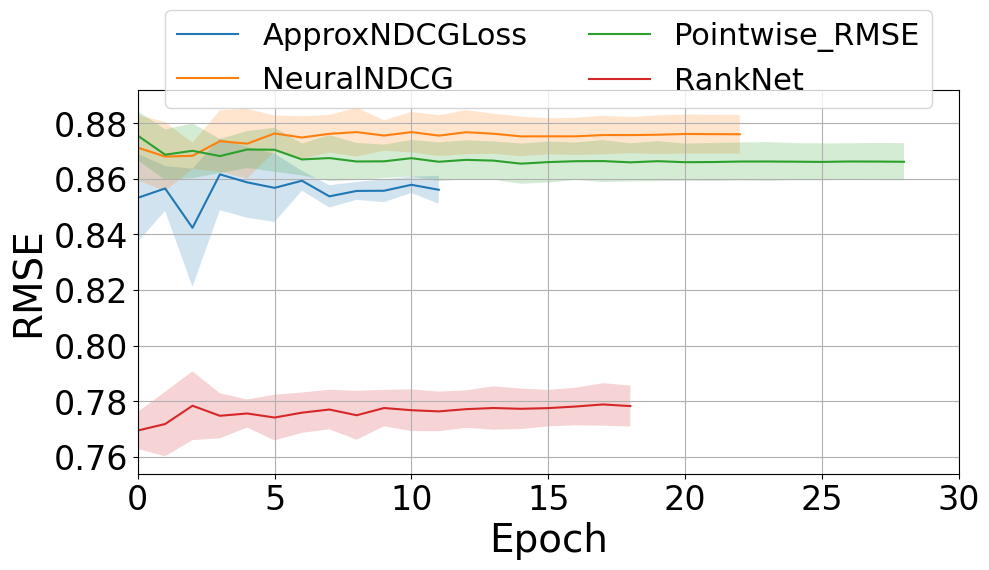

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [8]:
list_metric = ["precision", "map", "ndcg", "mrr", "rmse"]
levels = [1, 5, 10]

for metric in list_metric:
    for level in levels:
        plt.figure(figsize=(10, 6))  # New figure for each metric and level combination
        current_metric = f"{metric}_{level}"

        if current_metric in metrics_data["rankNet"]:  # Check if the metric exists for the current loss
            for loss in metrics_data.keys():
                    # Prepare data for plotting
                    transposed_values = list(zip(*metrics_data[loss][current_metric].values()))
                    average = np.array([np.mean(group) for group in transposed_values])
                    std = np.array([np.std(group) for group in transposed_values])
                    epochs = range(0, len(average))  # Assuming epochs start from 1
                    
                    if loss == "pointwise_rmse":
                        loss = "Pointwise_RMSE"
                    else:
                        loss = loss[0].upper() + loss[1:]
                    # Plotting
                    plt.plot(epochs, average, label=f'{loss}')
                    plt.fill_between(epochs, average - std, average + std, alpha=0.2)
            if current_metric == "precision_1" or current_metric == "precision_5" or current_metric == "precision_10":
                parts = current_metric.split("_")
                current_metric = str.capitalize(parts[0].upper()) + "@" + parts[1]
            elif current_metric == "rmse_1":
                current_metric = "RMSE"
            else:
                parts = current_metric.split("_")

                # transform the name to uppercase and combine it with '@' and the number
                current_metric = parts[0].upper() + "@" + parts[1]
                
            plt.xlabel('Epoch', fontsize=28)
            plt.ylabel(current_metric, fontsize=28)
            plt.xticks(fontsize=24)
            plt.yticks(fontsize=24)
            plt.xlim(0, 30)
            # plt.ylim(0.2, 0.9)  # Adjust y-axis limits if needed
            plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=2, fontsize=22)
            # plt.title(f'{metric.capitalize()} (Level {level}) Over Epochs Across Loss Functions')
            # plt.legend(fontsize=22)
            plt.grid(True)
            plt.tight_layout()
            plt.savefig(f'graphs/{metric}_{level}.pdf', format='pdf')
            # plt.show()

In [10]:
import pandas as pd

# Assuming metrics_data is predefined and contains your data
list_metric = ["precision", "map", "ndcg", "mrr", "rmse"]
levels = [1, 5, 10]
max_values_per_loss = {}

for metric in list_metric:
    for level in levels:
        current_metric = f"{metric}_{level}"
        max_values_per_loss[current_metric] = {}

        for loss in metrics_data.keys():
            if current_metric in metrics_data[loss]:
                # Prepare data to find the maximum value
                all_values = [value for values in metrics_data[loss][current_metric].values() for value in values]
                max_value = round(max(all_values), 3)
                max_values_per_loss[current_metric][loss] = max_value

# Convert the dictionary to a DataFrame for better table visualization
df_max_values = pd.DataFrame(max_values_per_loss)

# Display the DataFrame
print(df_max_values)

# Save the DataFrame to a CSV file
df_max_values.to_csv('max_metric_values.csv')

                precision_1  precision_5  precision_10  map_1  map_5  map_10  \
approxNDCGLoss        0.670        0.649         0.620  0.670  0.749   0.721   
neuralNDCG            0.768        0.701         0.658  0.768  0.803   0.768   
pointwise_rmse        0.767        0.707         0.662  0.767  0.803   0.770   
rankNet               0.777        0.706         0.669  0.777  0.807   0.772   

                ndcg_1  ndcg_5  ndcg_10  mrr_1  mrr_5  mrr_10  rmse_1  rmse_5  \
approxNDCGLoss   0.317   0.371    0.406  0.192  0.293   0.313   0.883     NaN   
neuralNDCG       0.498   0.480    0.496  0.368  0.461   0.475   0.893     NaN   
pointwise_rmse   0.467   0.464    0.483  0.328  0.433   0.447   0.889     NaN   
rankNet          0.427   0.435    0.459  0.287  0.379   0.394   0.791     NaN   

                rmse_10  
approxNDCGLoss      NaN  
neuralNDCG          NaN  
pointwise_rmse      NaN  
rankNet             NaN  
